In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

### 加载数据集

In [2]:
data_root = '.'  # 改成自己电脑上的路径即可
dataset = pd.read_csv(data_root + '/perfect_3.csv')
header = dataset.columns.values.tolist()
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,257.0,2.570000e+02,2.570000e+02,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,3.0,2.017741e+13,2.017745e+13,5059.521401,152351.112840,138.315175,24.373541,46.296498,21.922957,333.768093,368.296109,-40.590272,-22.291829,20.171206,10.424125,12.805245
std,0.0,4.227176e+09,4.212916e+09,4905.722032,8903.017228,632.343142,20.998428,25.133370,13.071467,19.044387,9.145409,37.395150,23.156795,7.453100,7.918227,6.114158
min,3.0,2.017110e+13,2.017110e+13,240.000000,136494.000000,1.000000,0.800000,8.800000,0.400000,255.900000,329.000000,-134.700000,-121.600000,-1.000000,-3.000000,0.106000
25%,3.0,2.017122e+13,2.017122e+13,2130.000000,146326.000000,57.000000,8.800000,29.600000,14.000000,325.800000,366.800000,-84.700000,-17.400000,16.000000,6.000000,8.193000
50%,3.0,2.018012e+13,2.018012e+13,3620.000000,151019.000000,81.000000,15.200000,33.600000,19.200000,333.200000,372.100000,-24.100000,-16.200000,19.000000,8.000000,13.495000
75%,3.0,2.018031e+13,2.018031e+13,5170.000000,155903.000000,101.000000,38.000000,77.000000,27.200000,344.300000,374.400000,-8.100000,-8.600000,24.000000,12.000000,17.616000
max,3.0,2.018061e+13,2.018061e+13,26071.000000,172430.000000,9703.000000,90.000000,100.000000,64.000000,373.100000,374.700000,-0.600000,-0.100000,43.000000,35.000000,25.175000


/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


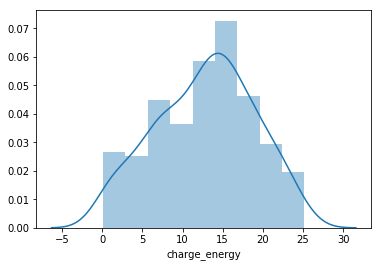

In [3]:
sns.distplot(dataset['charge_energy']);

### 特征选择

In [4]:
features = ['charge_duration', 'charge_start_soc', 'charge_start_U']
X = dataset[header[3:14]] # 
y = dataset[header[15]]

### 将数据区分为训练集和测试集

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(192, 11)
(192,)
(65, 11)
(65,)


### 数据标准化

In [6]:
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_train_scaled

array([[ 0.45793814,  0.4851959 ,  0.00742115, ...,  0.93959732,
         0.93072015,  0.275     ],
       [ 0.07355503,  0.49023264,  0.00721501, ...,  0.37061894,
         0.85232452,  0.375     ],
       [ 0.11846231,  0.91907836,  0.00391672, ...,  0.9448173 ,
         0.92980857,  0.775     ],
       ..., 
       [ 0.10181565,  0.33442787,  0.00298907, ...,  0.37061894,
         0.89152233,  0.5       ],
       [ 0.42468352,  0.50779163,  0.00608122, ...,  0.94407159,
         0.93163172,  0.25      ],
       [ 0.2024699 ,  0.35329475,  0.01473923, ...,  0.96271439,
         0.88787603,  0.425     ]])

### 参数选择

In [7]:
#导入sklearn库中的VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
#设置方差的阈值为0.08
sel = VarianceThreshold(threshold=0.08)
#选择方差大于0.08的特征
X_sel=sel.fit_transform(X_train.astype(np.float64))
X_sel.shape

(192, 11)

### 训练模型

In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
print(linreg)
print(linreg.intercept_)
print(linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
12.0233650726
[  3.20583679  -1.0766599   -0.59319437  -7.0491568   -1.95286288
   6.53204258 -18.48546806  12.38854268  -3.19372246   4.31151996
   3.98651047]


### 预测结果并评价
> [评价方法点击这里](https://blog.csdn.net/SA14023053/article/details/51707305)

In [9]:
#模型拟合测试集
y_pred = linreg.predict(scaler.transform(X_test))

#评估模型
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# 用scikit-learn计算MAE
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
# 计算精确度
# for i in range(len(y_pred)):
#     if y_pred[i] < 0:
#         y_pred[i] = 0.4

error_array = np.array(((y_test - y_pred) / y_test))
error_rate = np.sqrt(np.sum(np.power(error_array,2)))
print("error_rate: %f" % error_rate)

MSE: 2.45115001357
RMSE: 1.56561489951
MAE: 1.23343833513
error_rate: 6.221141


### 真实值与预测值越接近y=x表明预测越准确

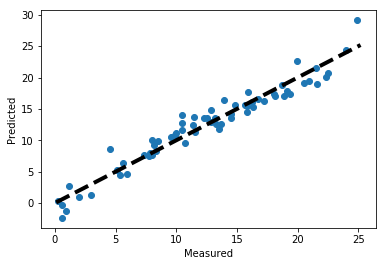

In [10]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Q-Q图（分位数概率分布）
> Q-Q图是一种散点图,对应于正态分布的Q-Q图,就是由标准正态分布的分位数为横坐标,样本值为纵坐标的散点图. 要利用QQ图鉴别样本数据是否近似于正态分布,只需看Q-Q图上的点是否近似地在一条直线附近,而且该直线的斜率为标准差,截距为均值. 用QQ图还可获得样本偏度和峰度的粗略信息.

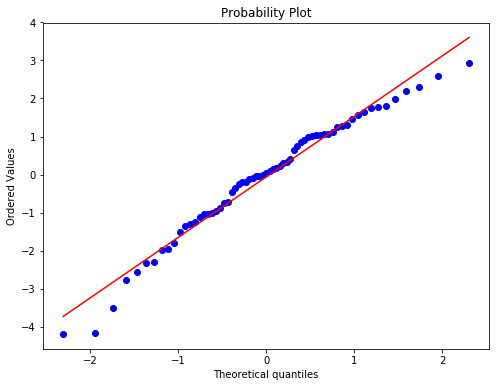

In [11]:
from scipy.stats import probplot
f = plt.figure(figsize=(8, 6))
ax = f.add_subplot(111)
probplot(y_test - y_pred, plot=ax);

### 残差直方图

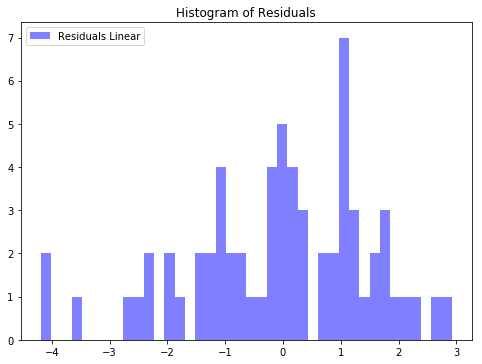

In [12]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_test - y_pred, bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');

### 下面的内容是持续优化模型，交叉验证，可忽略

In [13]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, scaler.transform(X), y, cv=10)

from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))
# 用scikit-learn计算MAE
print("MAE:",metrics.mean_absolute_error(y, predicted))
# 计算精确度
# for i in range(len(y_pred)):
#     if y_pred[i] < 0:
#         y_pred[i] = 0.4
error_array = np.array(((y - predicted) / y))
error_rate = np.sqrt(np.sum(np.power(error_array,2)))
print("error_rate: %f" % error_rate)

MSE: 3.39478234446
RMSE: 1.84249351273
MAE: 1.33037881982
error_rate: 35.356645


### 可视化预测结果

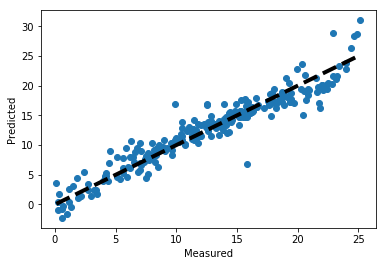

In [14]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()